# Naive Bayesian - Gaussian

- Logistic Regression and Naive Baye are two baseline algorithms for classification
- Baselines mean they serve like the mininum
- When you do classification, it's a no brainer to use Logistic and Naive
  - they are so simple yet so effective
- **Key idea for GNB**: use the normal distribution to estimate y

$$
P(y|x) = \frac{P(x|y)P(y)}{P(x)}
$$

In previous class, you estimate $P(y | x)$ directly using gradient descent.

But we can do another way, that is, using naive baye algorithm, i.e., if we can find $P(x | y)$, then we can find $P(y | x)$ ===> "generative algorithms"

So we can ask something like this right, e.g., $P(y | x = 4)$ ==>

$$P(y = class 1 | x = 4)$$ 
$$P(y = class 2 | x = 4)$$ 
and so on...

$$\frac{P(x|y = class 1)P(y = class 1)}{P(x)}$$ 
$$\frac{P(x|y = class 2)P(y = class 2)}{P(x)}$$ 
and so on...

We can ignore $P(x)$, and compare only the numerator (top guy)

$$P(x|y = class 1)P(y = class 1)$$ 
$$P(x|y = class 2)P(y = class 2)$$ 

So we have two components here, the easy one is $P(y = class 1)$ and $P(y = class 2)$, they are basically:

$$P(y = 1) = \frac{\sum_{i=1}^m 1(y=1)}{m}$$
$$P(y = 0) = \frac{\sum_{i=1}^m 1(y=0)}{m}$$

Now the question is the left part, which is $P(x|y = class 1)$, how to find?

Answer: not easy!

Naive answer: assume $P(x | y)$ follows some statistical distribution.

- if your x is continuous, you can assume gaussian distribution
- if your x is discrete, you can assume multinomial distribution


In [1]:
import numpy as np

X_train = np.array([
    [1, 2, 3], 
    [4, 5, 6], 
    [7, 8, 9],
    [10, 11, 12],
    [11, 12, 13]
])

y_train = np.array([0, 0, 0, 1, 1])

cond0 = y_train == 0
cond1 = y_train == 1

m0 = len(y_train[cond0])
m1 = len(y_train[cond1])
m  = len(y_train)

#simple exercise: find P(y = 0), P(y = 1) ==> priors
prior0 = m0 / m
prior1 = m1 / m

prior0, prior1

(0.6, 0.4)

In [2]:
#I want to find P(x | y = 0), P(x | y = 1)
#to make it, we need the normal distribution,
#before we have the normal distribution, we need to find the mean and std

#mean of each class of each feature
#std  of each class of each feature

#mean.shape: (k, n) or (n, k) #here k = #class, n = #features
#std.shape:  (k, n)

#please find these mean and std

In [3]:
def mean_std(X, y, k):
    #create empy mean and std
    n    = X.shape[1]
    mean = np.zeros((k, n))
    std  = np.zeros((k, n))
    
    #for loop, loop each cond
    for label in range(k):
        mean[label, :] = X[y == label].mean(axis=0)
        std[label, :]  = X[y == label].std(axis=0)
    return mean, std

mean, std = mean_std(X_train, y_train, 2)

print("Mean: ", mean)
print("Std: ", std)

Mean:  [[ 4.   5.   6. ]
 [10.5 11.5 12.5]]
Std:  [[2.44948974 2.44948974 2.44948974]
 [0.5        0.5        0.5       ]]


In [4]:
#we can now create the normal distribution - pdf - probability density function

$$ P(x \mid y=1 ; \mu_1, \sigma_1^{2}) = \frac{1}{\sqrt{2\pi\sigma_1^{2}}}e ^{-\frac{(x-\mu_1)^{2}}{2\sigma_1^{2}}}$$
$$ P(x \mid y=0 ; \mu_0, \sigma_0^{2}) = \frac{1}{\sqrt{2\pi\sigma_0^{2}}}e ^{-\frac{(x-\mu_0)^{2}}{2\sigma_0^{2}}}$$

In [9]:
#1. create a function called gaussian_pdf(X_test, mean, std)
    #return the probability
    
#Note that this mean and std COMES FROM training set....
#but when we predict, we use X_test
def gaussian_pdf(X_test, mean, std):
    left = 1 / (np.sqrt(2 * np.pi) * std)
    power = (X_test - mean) ** 2 / (2 * (std ** 2))
    right = np.exp(-power)
    return left * right
    
#2. Create some X_test, and try to predict the y
X_test = np.array([    [11, 12, 13], [1, 2, 5]   ])

pdf0 = gaussian_pdf(X_test, mean[0, :], std[0, :])
pdf1 = gaussian_pdf(X_test, mean[1, :], std[1, :])

print(pdf1) 
#m, n
#0.0081087 is the probability of sample1 of feature1 for class0
#0.07693316 is the probability of sample2 of feature1 for class0
#interpret: sample2 has a much higher probability to become class0
#interpret: sample1 has a much higher probabilty to become class1

[[4.83941449e-01 4.83941449e-01 4.83941449e-01]
 [3.24927207e-79 3.24927207e-79 1.10614191e-49]]


#this is the naive part, which assumes that each features are independent
#thus the final probability is simply multiplication of it (principle of IID)
$$P(x \mid y) = \prod_{i=1}^n P( x_i \mid y )$$

In [10]:
total_likelihood0 = np.prod(pdf0, axis=1)
total_likelihood1 = np.prod(pdf1, axis=1)

print(total_likelihood0, total_likelihood1)

[2.06726389e-08 8.86891295e-04] [1.13338761e-001 1.16783908e-206]


$$P(x|y = class 1)P(y = class 1)$$ 
$$P(x|y = class 2)P(y = class 2)$$ 

In [11]:
posterior0 = prior0 * total_likelihood0
posterior1 = prior1 * total_likelihood1

print(posterior0, posterior1)

[1.24035833e-08 5.32134777e-04] [4.53355045e-002 4.67135631e-207]


In [12]:
yhat = 1 * (posterior1 > posterior0)

yhat

array([1, 0])

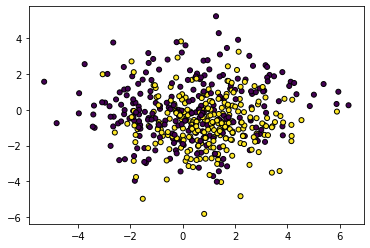

In [18]:
#Exercise:
from random import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=500, n_features=10, n_redundant=1, n_informative=7,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

#1. load the data (done!)
#2. act like you do EDA (done!)
#3. split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=999)

#4. preprocess - clean (no need), standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  #we transform all columsn bc all columns are cont.
X_test  = sc.transform(X_test) #use train set to transform test set


In [20]:
class GNB(object):
    
    def _mean_std(self, X, y, k):
        #create empy mean and std
        n    = X.shape[1]
        mean = np.zeros((k, n))
        std  = np.zeros((k, n))
        
        #for loop, loop each cond
        for label in range(k):
            mean[label, :] = X[y == label].mean(axis=0)
            std[label, :]  = X[y == label].std(axis=0)
        return mean, std
    
    def _gaussian_pdf(self, X_test, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        power = (X_test - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-power)
        return left * right
    
    def _prior(self, y_train):
        cond0 = y_train == 0
        cond1 = y_train == 1
        
        m0 = len(y_train[cond0])
        m1 = len(y_train[cond1])
        m  = len(y_train)

        prior0 = m0 / m
        prior1 = m1 / m
        
        return prior0, prior1
    
    def __init__(self):
        pass
    
    def fit(self, X_train, y_train):
        k = len(set(y_train))
        self.mean, self.std = self._mean_std(X_train, y_train, k)
        self.prior0, self.prior1 = self._prior(y_train)
        
    def predict(self, X_test):
        likelihood0 = self._gaussian_pdf(X_test, self.mean[0, :], self.std[0, :])
        likelihood1 = self._gaussian_pdf(X_test, self.mean[1, :], self.std[1, :])
        
        total_likelihood0 = np.prod(likelihood0, axis = 1)
        total_likelihood1 = np.prod(likelihood1, axis = 1)
        
        posterior0 = self.prior0 * total_likelihood0
        posterior1 = self.prior1 * total_likelihood1
        
        return 1 * (posterior1 > posterior0)

In [21]:
#5. fit the naive baye algorithm (make it into a class)
gnb = GNB()
gnb.fit(X_train, y_train)

In [22]:
#6. predict with X_test
yhat = gnb.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [25]:
#check the classification report, confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        71
           1       0.85      0.78      0.82        79

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.82      0.81      0.81       150



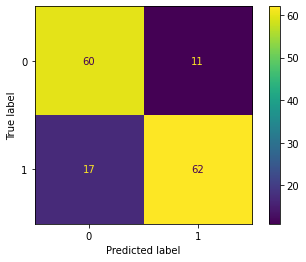

In [29]:
cm = confusion_matrix(y_test, yhat)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cmd.plot()